# Fundamentos de computación cuántica

A lo largo de este notebook de python, se presentan las aplicaciones e implementaciones de las bases de la computación cuántica desarrolladas en la memoria.

Antes de empezar, es necesario la descarga e importación de las siguientes librerias:

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import Aer
import matplotlib.pyplot as plt

### Qubits

Se construye un circuito de 3 qubits, donde cada qubit representa un estado diferente. El qubit 0 representa el ket 0, el qubit 1 el ket 1 y el qubit 2 un estado de superposición. La representación se hace por una esfera de Bloch.


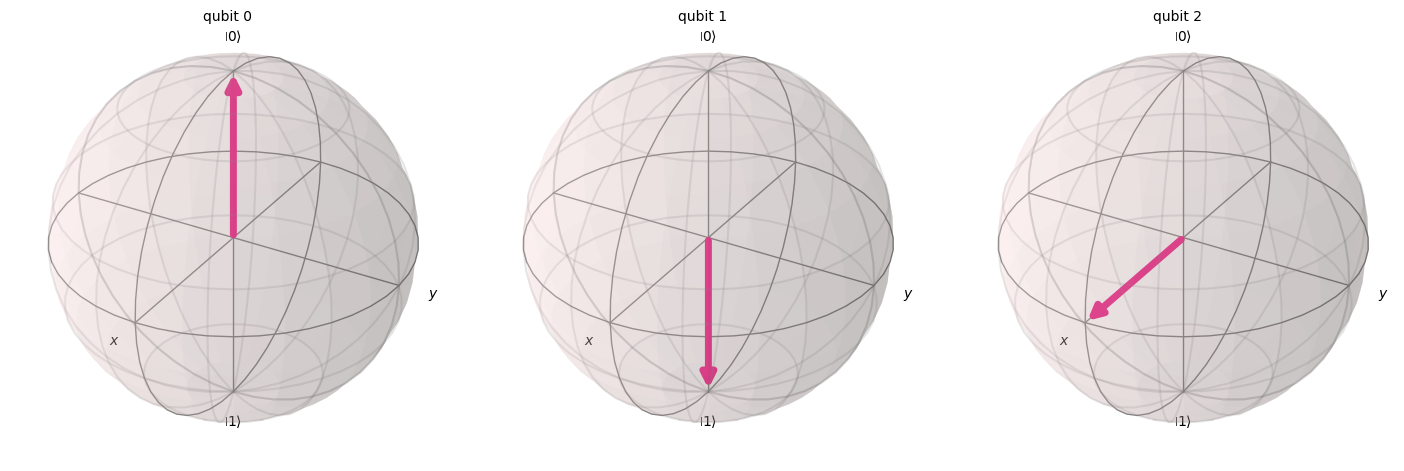

In [9]:
qc = QuantumCircuit(3)

qc.x(1)
qc.h(2)

#Esfera de Bloch
backend = Aer.get_backend('statevector_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()
statevector = result.get_statevector()
plot_bloch_multivector(statevector)


También se puede representar las probabilidades de colapsar a cada estado con un diagrama de barras.

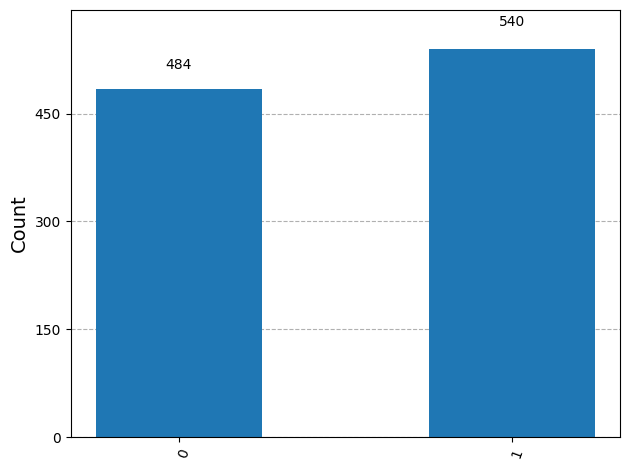

In [11]:
qc = QuantumCircuit(1)

qc.h(0)

qc.measure_all()

#Histograma de resultados
out = Aer.get_backend('qasm_simulator').run(transpile(qc, Aer.get_backend('qasm_simulator'))).result().get_counts()
plot_histogram(out)

### Puertas cuánticas

#### Puertas de Pauli

In [12]:
qc = QuantumCircuit(3)

qc.x(0) #Aplicamos la puerta X al qubit 0
qc.y(1) #Aplicamos la puerta Y al qubit 1
qc.z(2) #Aplicamos la puerta Z al qubit 2

#Visualizamos el circuito
qc.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     ├───┤
q_2: ┤ Z ├
     └───┘

#### Puerta Hadamard

In [13]:
qc = QuantumCircuit(1)

qc.h(0) #Aplicamos la puerta Hadamard al qubit 0

#Visualizamos el circuito
qc.draw()

┌───┐
q: ┤ H ├
   └───┘

#### Puerta CNOT

In [14]:
qc = QuantumCircuit(2)

qc.cx(0,1) #Aplicamos la puerta CNOT con el qubit 0 como control y el qubit 1 como objetivo

qc.cx(1,0) #Aplicamos la puerta CNOT con el qubit 1 como control y el qubit 0 como objetivo

#Visualizamos el circuito
qc.draw()

┌───┐
q_0: ──■──┤ X ├
     ┌─┴─┐└─┬─┘
q_1: ┤ X ├──■──
     └───┘